In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pyrosm

import geopandas as gpd
import pandas as pd

import matplotlib.pyplot as plt

from osmium_sidewalk import *

import warnings
warnings.filterwarnings('ignore', message='.*initial implementation of Parquet.*')

In [12]:
# Using pyrosm extract street network data
filename = 'data/osm/chi.osm.pbf'
city = 'chi'
osm = pyrosm.OSM(filename)
gdf = osm.get_network()[['id', 'timestamp', 'version', 'tags', 'sidewalk', 'geometry', 'width', 'length']]
gdf = gdf.to_crs('epsg:3395')
gdf.to_feather('data/osm_road_network/%s.feather'%city, compression='lz4')

In [24]:
gdf = gpd.read_feather('data/osm_road_network/chi.feather')

In [26]:
gdf_slice = gdf[gdf['sidewalk']!='no']
gdf_slice = gdf_slice[gdf_slice['sidewalk'].notnull()]
gdf_slice

,id,timestamp,version,tags,sidewalk,geometry,width,length
15,4476710,1658872029,23,None,both,"MULTILINESTRING ((-9754300.227 5114042.389, -9...",None,273.0
24,4477283,1574457198,15,"{""loc_ref"":""200 S""}",both,"MULTILINESTRING ((-9754292.090 5114424.543, -9...",None,12.0
25,4477285,1645434851,19,"{""loc_ref"":""0 N/S""}",both,"MULTILINESTRING ((-9754312.884 5114800.947, -9...",None,70.0
38,5010709,1636371902,23,"{""loc_ref"":""100 E""}",both,"MULTILINESTRING ((-9754182.151 5113875.150, -9...",None,144.0
39,5010711,1644227569,19,"{""loc_ref"":""500 S"",""name:etymology:wikidata"":""...",right,"MULTILINESTRING ((-9753933.352 5113881.018, -9...",None,98.0
...,...,...,...,...,...,...,...,...
169090,1072486886,1655956177,1,None,both,"MULTILINESTRING ((-9758319.440 5131805.988, -9...",None,177.0
169237,1073479386,1658104949,2,"{""tiger:cfcc"":""A41"",""tiger:county"":""Cook, IL"",...",both,"MULTILINESTRING ((-9773856.846 5115502.406, -9...",None,14.0
169780,1074080269,1656387149,1,"{""lanes:backward"":""2"",""lanes:both_ways"":""1"",""l...",separate,"MULTILINESTRING ((-9788604.731 5122185.061, -9...",None,79.0
169794,1074080283,1656387149,1,"{""lanes:backward"":""2"",""lanes:both_ways"":""1"",""l...",separate,"MULTILINESTRING ((-9789107.094 5122171.331, -9...",None,76.0


In [59]:
gdf_dtown = gdf.to_crs('epsg:4326').cx[-87.643842:-87.614230, 41.876533:41.89]
gdf_dtown_sidewalks = gdf_dtown[gdf_dtown['sidewalk']!='no']
gdf_dtown_sidewalks = gdf_dtown_sidewalks[gdf_dtown_sidewalks['sidewalk'].notnull()]

<AxesSubplot:>

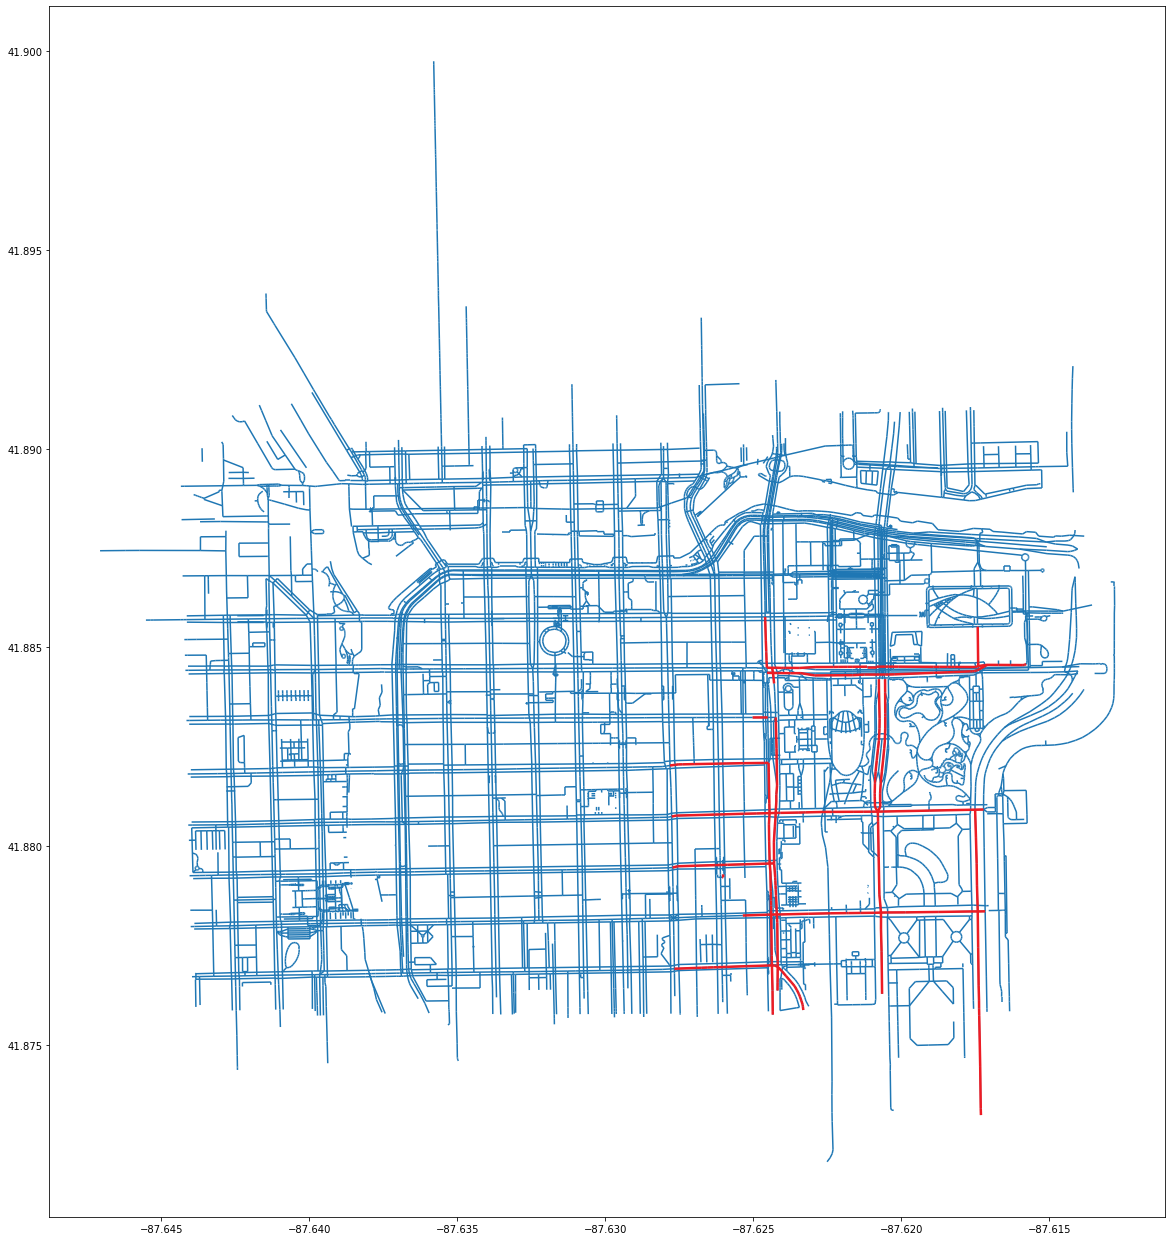

In [60]:
fig, ax = plt.subplots(figsize = (20,50)) 
gdf_dtown.plot(ax=ax)
gdf_dtown_sidewalks.plot(color = '#ED1C24', ax=ax, linewidth = 2.5)